In [1]:
import json

In [3]:
path = "../generated_texts/diffusion-openwebtext-512-512-d=2-final/200000-N=200-len=10000.json"

In [4]:
data = json.load(open(path, "r"))

In [8]:
pred_list = [d["GEN"] for d in data]
trg_list = [d["TRG"] for d in data]

In [9]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [15]:
trg_lens = [min(len(t), 512) for t in tokenizer(trg_list)["input_ids"]]
pred_lens = [min(len(t), 512) for t in tokenizer(pred_list)["input_ids"]]

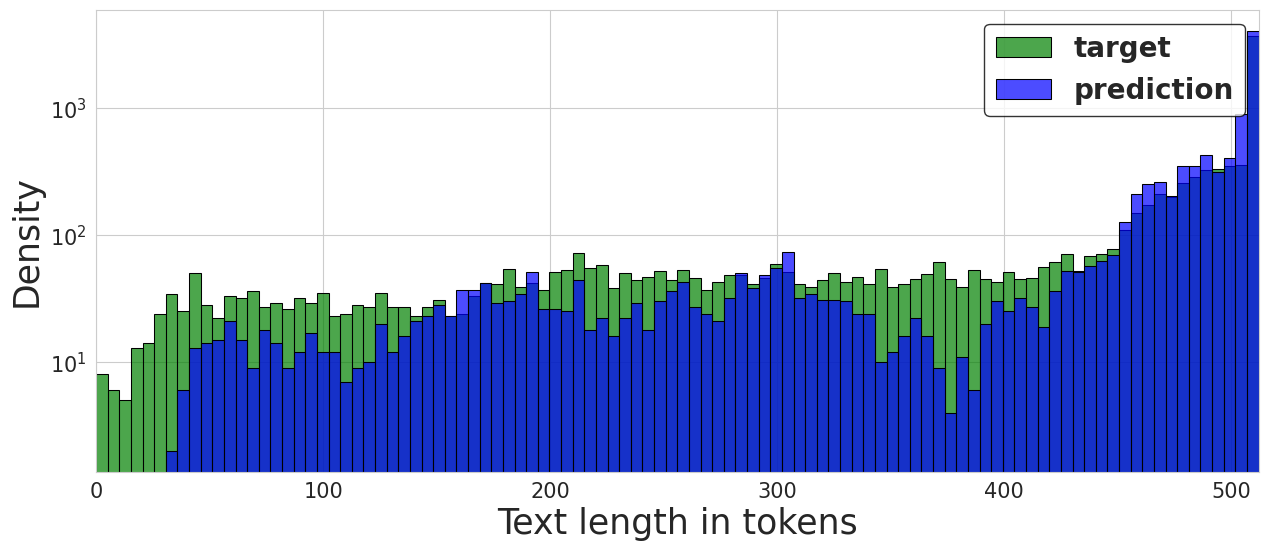

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the style for an awesome look
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))

max_length = 512

font_size = 20
num_bins = 100
bins = np.linspace(0, max_length, num_bins + 1)

# Plot histograms
sns.histplot(trg_lens, bins=bins, color="green", label="target", alpha=0.7, edgecolor="black")
sns.histplot(pred_lens, bins=bins, color="blue", label="prediction", alpha=0.7, edgecolor="black")

# Add title and labels with a creative touch
# Title with colored text
# plt.title("Positivity vs Negativity: A Histogram of Contrasts", fontsize=font_size + 10, fontweight="bold", pad=15)

plt.xlabel("Text length in tokens", fontsize=font_size + 5)
plt.ylabel("Density", fontsize=font_size + 5)

# Set x-axis limits between 0 and 1000
plt.xlim(0, max_length)

# Adjust tick sizes
plt.xticks(fontsize=font_size - 5)
plt.yticks(fontsize=font_size - 5)

plt.yscale("log")

# Add legend
legend = plt.legend(frameon=True, loc="upper right", prop={'weight': 'bold', 'size': font_size}, edgecolor="black")  # Positioned at the upper right with bold text

# Get legend position
# legend_bbox = legend.get_window_extent().transformed(plt.gcf().dpi_scale_trans.inverted())

# Save as PDF
# plt.savefig(f"openwebtext-512-histogram.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()